In [1]:
import os
import numpy as np

In [2]:
path_to_series = os.path.join("..", "examples", "datasets", "ecg-heartbeat-av.csv")
f = open(path_to_series)
series = np.array(f.readlines(), dtype=np.double)
series = (series - np.mean(series)) / np.std(series)
fs = 128  # sampling frequency

In [3]:
# uncomment this code block for the multivariate ECG example:
# path_to_series = os.path.join("..", "examples", "datasets", "mitdb_patient214.csv")
# f = open(path_to_series)
# series = np.array([line.split(',') for line in f.readlines()], dtype=np.double)
# series = (series - np.mean(series, axis=None)) / np.std(series, axis=None)

# fs = 360  # sampling frequency

In [4]:
print(series.shape)

(3001,)


In [5]:
# z-normalize time series
# series = (series - np.mean(series, axis=0)) / np.std(series, axis=0)

# Parameter rho determines the 'strictness' of the algorithm  
#   - higher -> more strict (more similarity in discovered motif sets)
#   - lower  -> less strict (less similarity in discovered motif sets) 
rho = 0.6

# Number of motifs to be found
nb_motifs = 2

# Heartbeats last 0.6s - 1s (equivalent to 60-100 bpm)
l_min = int(0.6 * fs)
l_max = int(  1 * fs)

# This parameter determines how much the motifs may overlap (intra and inter motif set)
overlap = 0

In [6]:
import locomotif.locomotif as locomotif
motif_sets = locomotif.apply_locomotif(series, l_min, l_max, rho=rho, nb=nb_motifs, overlap=overlap)
print(motif_sets)

fitnesses
[]
fitnesses
[]
[((1770, 1870), [(1770, 1870), (1664, 1771), (1869, 1977), (1347, 1472), (2157, 2266), (1557, 1665), (1976, 2074), (1236, 1348), (2265, 2381), (1472, 1558), (2073, 2158), (2454, 2549), (2825, 2940), (2380, 2455), (2548, 2646), (2645, 2721), (2720, 2826)]), ((486, 607), [(486, 607), (358, 479), (614, 735), (230, 351), (742, 836), (102, 223), (0, 95)])]


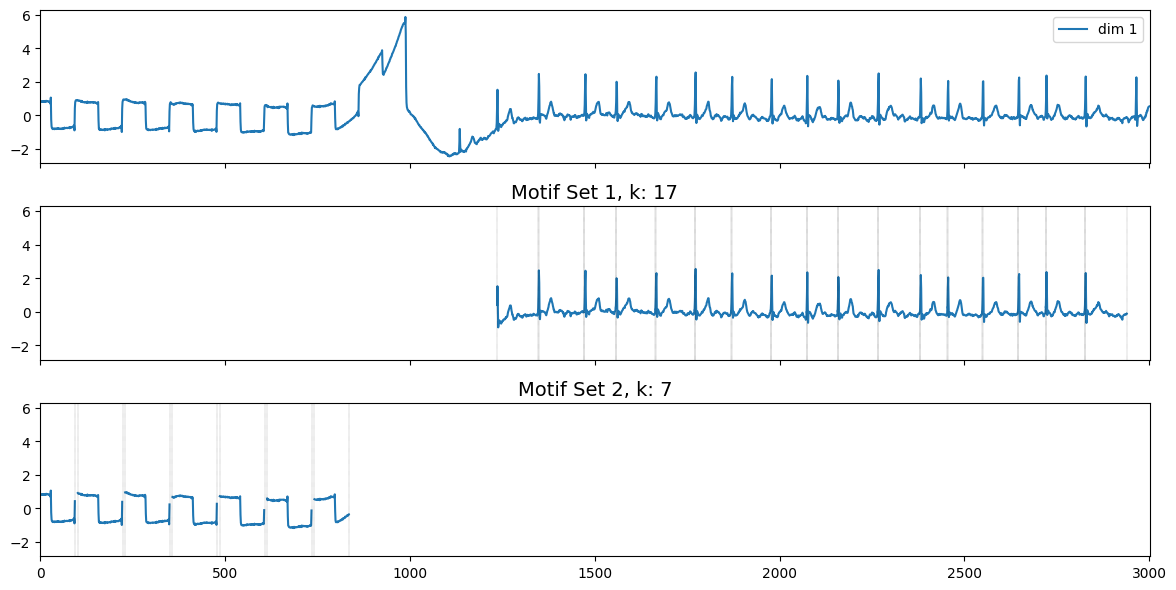

In [7]:
import locomotif.visualize as visualize
import matplotlib.pyplot as plt
fig, ax = visualize.plot_motif_sets(series, motif_sets)
plt.savefig('example.png')
plt.show()

### Without Time Warping

In [9]:
motif_sets = locomotif.apply_locomotif(series, l_min, l_max, rho, nb_motifs, overlap=overlap, warping=False)
print(motif_sets)

fitnesses
[]
fitnesses
[]
[((2827, 2911), [(2827, 2911), (1978, 2062), (1871, 1955), (2267, 2351), (1666, 1750), (1474, 1558), (1348, 1432), (1772, 1856), (2074, 2158), (2455, 2539), (1559, 1643), (2721, 2805), (2158, 2242), (2549, 2633)]), ((416, 544), [(416, 544), (288, 416), (544, 672), (160, 288), (672, 800), (32, 160)])]


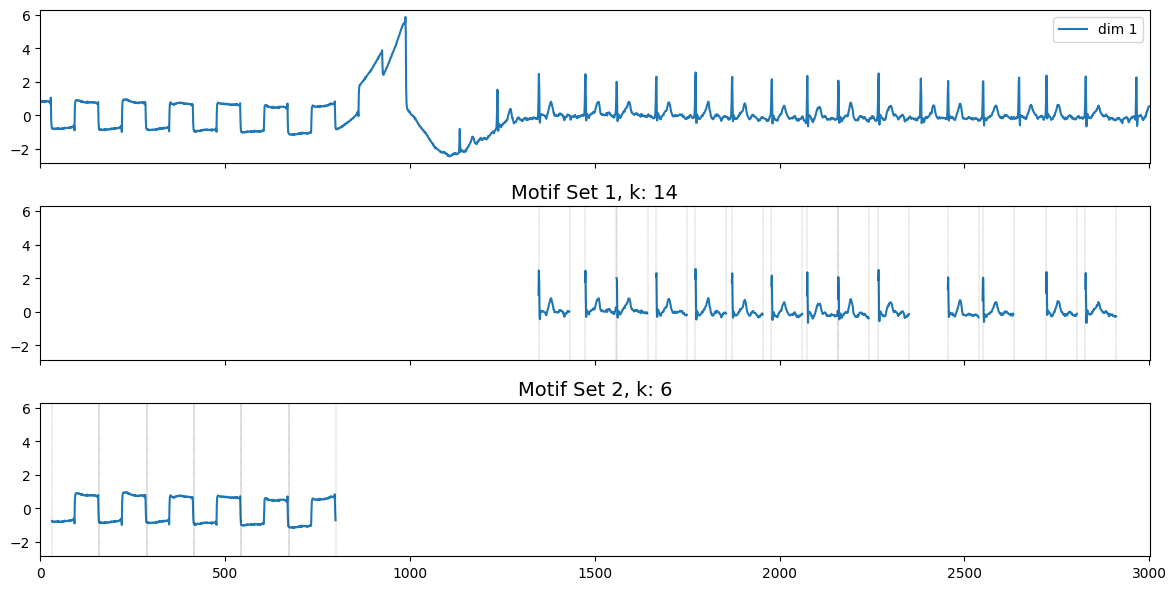

In [10]:
fig, ax = visualize.plot_motif_sets(series, motif_sets)
plt.savefig('example.png')
plt.show()

### Start and End Constraints

In [11]:
# start_mask specifies whether a motif can start at a certain time index (same for end_mask)

# for example: a candidate segment can only start in the second half of the time series:
n = len(series)
start_mask = np.full(n, True)
start_mask[:n//2] = False

In [ ]:
motif_sets = locomotif.apply_locomotif(series, l_min, l_max, rho, nb_motifs, overlap=overlap, start_mask=start_mask, end_mask=None)
print(motif_sets)

[[(1770, 1870), (1664, 1771), (1869, 1977), (1347, 1472), (2157, 2266), (1557, 1665), (1976, 2074), (1236, 1348), (2265, 2381), (1472, 1558), (2073, 2158), (2825, 2940), (2380, 2455), (2548, 2646), (2454, 2549), (2645, 2721), (2720, 2826)]]


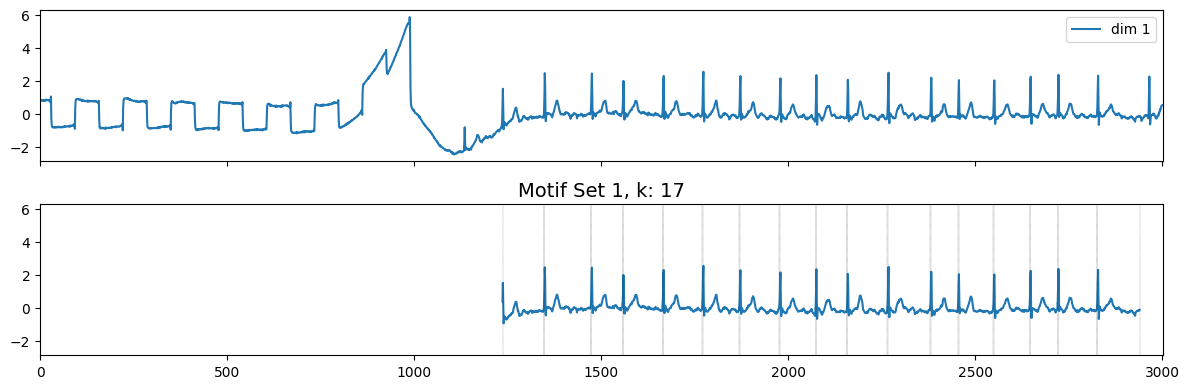

In [ ]:
fig, ax = visualize.plot_motif_sets(series, motif_sets)
plt.savefig('example.png')
plt.show()